In [1]:
import numpy as np
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# small_GTEx:  Adipose_Subcutaneous
## Load the small_gtex data
This data is part of the `adafdr` package and can be loaded directly. 
It takes the first 300k associations from chromosome 21 for the Adipose_Subcutaneous 
tissue.

`cate_name` is for the labelling of categorical covariate in `md.adafdr_explore`. It takes the format of dictionary of dictionaries. An example is as follows:

* `cate_name = {1: {0: 'name0', 1: 'name1'}}`

Here, dimension 0 has
no names. Dimension 1 is discrete and has two values 0,1, whose corresponding
names are name0, name1

In [2]:
data_name = 'Adipose_Subcutaneous'
p,x,cate_name,cis_name = dl.data_small_gtex_chr21(opt=data_name)
print('p', p.shape)
print('x', p.shape)
print('cate_name', cate_name)

p (300000,)
x (300000,)
cate_name {3: {1: 'TssA', 2: 'TssAFlnk', 3: 'TxFlnk', 4: 'Tx', 5: 'TxWk', 6: 'EnhG', 7: 'Enh', 8: 'ZNF/Rpts', 9: 'Het', 10: 'TssBiv', 11: 'BivFlnk', 12: 'EnhBiv', 13: 'ReprPC', 14: 'ReprPCWk', 15: 'Quies'}}


## covariate visualization
The four covariates (expression, alternative allele frequency, distance from TSS, 
chromatin status) are visualized in order.

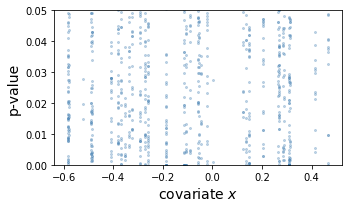

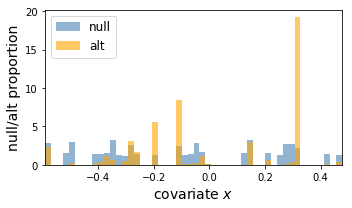

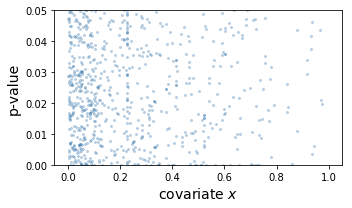

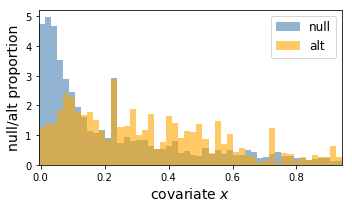

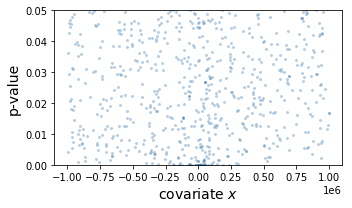

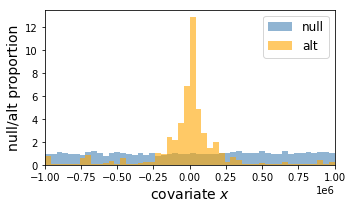

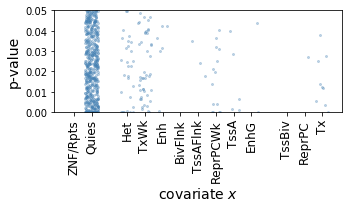

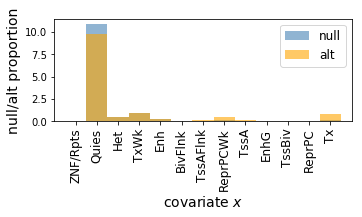

In [3]:
md.adafdr_explore(p, x, output_folder=None, cate_name=cate_name)

## hypothesis testing

# number of discoveries for BH: 1182
# number of discoveries for SBH: 1188
number of discoveris: 1469


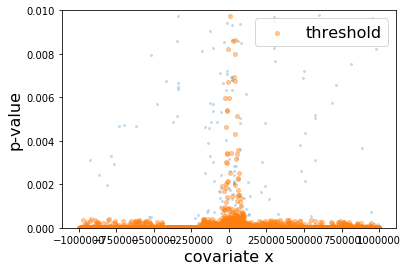

In [4]:
# Baseline methods: BH, SBH
alpha = 0.01
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
# AdaFDR
res = md.adafdr_test(p, x, fast_mode=False, alpha=0.01)
n_rej = res['n_rej']
t_rej = res['threshold']
print('number of discoveris: %d'%np.sum(p<=t_rej))
ind_rand = np.random.permutation(50000)[0:5000]
plt.figure()
plt.scatter(x[ind_rand, 2], p[ind_rand], alpha=0.2, s=4)
plt.scatter(x[ind_rand, 2], t_rej[ind_rand], s=16, alpha=0.4, label='threshold')
plt.ylim([0, 0.01])
plt.xlabel('covariate x', fontsize=16)
plt.ylabel('p-value', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.show()